In [ ]:
!pip install matplotlib

In [1]:
import syft as sy
%matplotlib inline
duet = sy.join_duet(loopback=True)

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!


/home/user-010/anaconda3/envs/pysyft/lib/python3.7/site-packages/aiortc/rtcdtlstransport.py:211: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  _openssl_assert(lib.SSL_CTX_use_certificate(ctx, self._cert._x509) == 1)  # type: ignore
/home/user-010/anaconda3/envs/pysyft/lib/python3.7/site-packages/aiortc/rtcdtlstransport.py:186: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  value=certificate_digest(self._cert._x509),  # type: ignore



♫♫♫ > CONNECTED!


In [2]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        
        self.lin =self.torch_ref.nn.Linear(11,8)
    def forward(self, x):
        x = self.lin(x)
        return x

In [3]:
import torch
model1 = SyNet(torch)
model1_ptr = model1.send(duet)

In [4]:
opt1 = duet.torch.optim.SGD(params=model1_ptr.parameters(),lr=0.0000001)

In [5]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 44a3cc39ff664fe4b61e3facbb6e547b>,[dataset],"Aeroponics(AER) Independent features Temp,WC,N...",<class 'torch.Tensor'>


In [6]:
data_pointer = duet.store[0]

In [7]:
import numpy as np

In [8]:

model2 = torch.nn.Linear(8,11)
opt2 = torch.optim.SGD(params=model2.parameters(), lr=0.0000001)

target = torch.tensor([[16.03,6.04,16.05,16.06,16.07,16.08,16.09,16.1,16.11,16.11,18.22],
                       [18.25,18.26,18.27,18.28,18.29,18.3,19.26,19.32,19.33,19.43,19.51],
                       [19.62,19.73,19.81,19.95,20.6,20.61,20.62,20.43,20.44,21.23,21.41],
                       [21.45,21.53,21.64,21.67,21.72,21.75,21.84,21.86,21.88,21.92,23.77],
                       [24.85,25.79,28.07,32.47,35.49,35.85,40.84,44.59,44.77,46.21,50.8],
                       [52.12,53,58.88,60.81,63.25,69.98,70.96,79.32,84.19,84.91,85.77],
                       [94.55,94.12,99.72,99.74,99.81,100.53,101.85,101.92,102.26,102.38,102.41],
                       [102.44,102.59,102.63,102.71,102.79,102.81,102.85,103.31,103.36,103.39,103.47]])
target.shape
#target.type

torch.Size([8, 11])

In [9]:
import matplotlib.pyplot as plt
#epoch = 200
losses = []
predictions = []
for iter in range(250):
    opt1.zero_grad()
    opt2.zero_grad()
    
    activation_ptr = model1_ptr(data_pointer)
    activation = activation_ptr.clone().get(request_block=True)
    
    pred = model2(activation)
    
    #target = target.detach().numpy()
    loss = ((pred - target)**2).sum()
   
    loss.backward()
    
    grad_ptr = activation.grad.clone().send(duet)
    activation_ptr.backward(grad_ptr)
    
    opt1.step()
    opt2.step()
    losses.append(loss.tolist())
    predictions.append(pred.tolist())
    
    print("losses: ",losses)
    print('Predictions =',pred)


losses:  [306680.1875]
Predictions = tensor([[-0.5402, -0.2426,  0.3386, -4.9986,  0.5270,  4.4333,  2.4579, -1.7193,
          2.4888,  3.7654, -1.6816],
        [-0.5958, -0.2952,  0.5184, -5.2822,  0.4523,  4.6305,  2.5941, -1.9009,
          2.4389,  4.1201, -1.7130],
        [-0.5894,  0.0650,  0.7918, -5.2615,  0.6059,  4.9219,  2.8352, -1.5286,
          2.5999,  3.8446, -1.9398],
        [-0.6380,  0.4518,  1.0296, -5.3056,  0.8526,  5.3910,  3.1391, -1.2585,
          2.7746,  3.5706, -2.2287],
        [-0.7305,  0.4583,  1.4392, -5.7617,  0.7073,  5.8390,  3.4527, -1.6419,
          2.4776,  4.1201, -2.2826],
        [-0.7157,  1.0660,  1.7247, -5.9363,  0.9133,  6.3025,  3.9560, -0.9601,
          2.8739,  3.7407, -2.7292],
        [-0.7601,  1.2026,  1.9436, -6.2004,  0.9351,  6.6388,  4.2212, -0.9608,
          2.8982,  3.8926, -2.8874],
        [-0.7277,  1.3402,  2.2170, -6.3775,  0.7560,  6.6398,  4.4032, -0.7642,
          2.8407,  4.0393, -2.9377]], grad_fn=<AddmmBack

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875]
Predictions = tensor([[ 9.3777e-02,  2.7753e-01,  2.0997e+00, -3.2728e+00,  1.9546e+00,
          5.4586e+00,  2.8295e+00,  2.0621e-01,  4.4157e+00,  3.6520e+00,
         -1.9284e+00],
        [ 6.6377e-02,  2.4884e-01,  2.3496e+00, -3.4869e+00,  1.9379e+00,
          5.6985e+00,  2.9844e+00,  1.0171e-01,  4.4426e+00,  4.0077e+00,
         -1.9632e+00],
        [ 8.2458e-02,  6.1749e-01,  2.6479e+00, -3.4417e+00,  2.1122e+00,
          6.0053e+00,  3.2321e+00,  5.0124e-01,  4.6308e+00,  3.7321e+00,
         -2.1919e+00],
        [ 4.7921e-02,  1.0166e+00,  2.9195e+00, -3.4522e+00,  2.3872e+00,
          6.4956e+00,  3.5460e+00,  8.0865e-01,  4.8426e+00,  3.4595e+00,
         -2.4813e+00],
        [-5.9483e-03,  1.0565e+00,  3.4170e+00, -3.8202e+00,  2.3158e+00,
          6.9991e+00,  3.8873e+00,  5.2220e-01,  4.6418e+00,  4.0162e+00,
         -2.5323e+00],
        [ 

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625]
Predictions = tensor([[ 0.6837,  0.7956,  3.6635, -1.8149,  3.2196,  6.4546,  3.2609,  1.8791,
          6.1323,  3.6750, -2.0793],
        [ 0.6822,  0.7901,  3.9754, -1.9701,  3.2541,  6.7355,  3.4361,  1.8414,
          6.2273,  4.0360, -2.1145],
        [ 0.7086,  1.1683,  4.2971, -1.9027,  3.4480,  7.0584,  3.6924,  2.2663,
          6.4412,  3.7634, -2.3423],
        [ 0.6884,  1.5805,  4.6000, -1.8833,  3.7494,  7.5702,  4.0182,  2.6075,
          6.6874,  3.4958, -2.6293],
        [ 0.6698,  1.6524,  5.1752, -2.1766,  3.7433,  8.1266,  4.3886,  2.4052,
          6.5719,  4.0642, -2.6746],
        [ 0.7576,  2.3228,  5.6664, -2.1557,  4.1154,  8.7150,  4.9396,  3.3092,
          7.1935,  3.6750, -3.1517],
        [ 0.7709,  2.5097,  6.0295, -2.2804,  4.2559,  9.1422,  5.24

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5]
Predictions = tensor([[ 1.3423,  1.4014,  5.2888, -0.3537,  4.5387,  7.5715,  3.8196,  3.5897,
          7.9214,  3.8408, -2.1305],
        [ 1.3693,  1.4223,  5.6649, -0.4502,  4.6263,  7.8977,  4.0199,  3.6201,
          8.0871,  4.2125, -2.1624],
        [ 1.4081,  1.8124,  6.0121, -0.3591,  4.8419,  8.2394,  4.2877,  4.0721,
          8.3290,  3.9462, -2.3864],
        [ 1.4045,  2.2404,  6.3484, -0.3083,  5.1718,  8.7760,  4.6290,  4.4492,
          8.6119,  3.6874, -2.6676],
        [ 1.4244,  2.3482,  7.0038, -0.5270,  5.2333,  9.3905,  5.0342,  4.3324,
          8.5848,  4.2740, -2.7027],
        [ 1.5544,  3.0582,  7.5986, -0.4132,  5.6898, 10.0509,  5.6218,  5.3454,
          9.3203

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125]
Predictions = tensor([[ 1.9855,  2.0102,  6.7552,  0.9339,  5.7370,  8.6428,  4.4194,  5.1157,
          9.5390,  4.1179, -2.0662],
        [ 2.0399,  2.0571,  7.1890,  0.8891,  5.8727,  9.0122,  4.6457,  5.2066,
          9.7683,  4.5039, -2.0911],
        [ 2.0912,  2.4595,  7.5598,  1.0019,  6.1087,  9.3724,  4.9261,  5.6837,
         10.0363,  4.2458, -2.3092],
        [ 2.1043,  2.9036,  7.9269,  1.0812,  6.4651,  9.9330,  5.2837,  6.0935,
         10.3531,  3.9981, -2.5824],
        [ 2.1608,  3.0462,  8.6542,  0.9282,  6.5875, 10.6024,  5.7241,  6.0528,
         10.4054,  4.6064, -2.6035],
        [ 2.3332

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375]
Predictions = tensor([[ 2.7211,  2.7181,  8.3063,  2.2792,  7.0163,  9.8326,  5.1471,  6.7189,
         11.2528,  4.5385, -1.8760],
        [ 2.8063,  2.7947,  8.8010,  2.2883,  7.2031, 10.2495,  5.4043,  6.8732,
         11.5493,  4.9442, -1.8892],
        [ 2.8723,  3.2115,  9.1972,  2.4244,  7.4613, 10.6305,  5.6997,  7.3773,
         11.8453,  4.6972, -2.0986],
        [ 2.9044,  3.6740,  9.5971,  2.5340,  7.8464, 11.2180,  6.0768,  7.8219,
         12.1984,  4.4640, -2.3602],
        [ 3.0017,  3.8560, 10.4001,  2.4493,  8.0334,

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625]
Predictions = tensor([[ 3.5662,  3.5391,  9.9544,  3.7026,  8.3908, 11.1506,  6.0169,  8.4161,
         13.0758,  5.1198, -1.5349],
        [ 3.6865,  3.6498, 10.5135,  3.7685,  8.6322, 11.6198,  6.3102,  8.6373,
         13.4436,  5.5513, -1.5305],
        [ 3.7694,  4.0831, 10.9370,  3.9299,  8.9147, 12.0240,  6.6234,  9.1703,
         13.7698,  5.3186, -1.7281],
        [ 3.8232,  4.5670, 11.3721,  4.0719,  9.3309, 12.6412,  7.0233,  9.6522,
         

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125]
Predictions = tensor([[ 4.5360,  4.4856, 11.7070,  5.2211,  9.8714, 12.6029,  7.0407, 10.2194,
         15.0161,  5.8779, -1.0182],
        [ 4.6959,  4.6350, 12.3344,  5.3473, 10.1713, 13.1295,  7.3760, 10.5115,
         15.4595,  6.3418, -0.9897],
        [ 4.7981,  5.0874, 12.7872,  5.5359, 10.4801, 13.5593,  7.7098, 11.0756,
         15.8181,  6.1266, -1.1719],
        

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125]
Predictions = tensor([[ 5.6422,  5.5669, 13.5663,  6.8469, 11.4641, 14.1915,  8.2274, 12.1357,
         17.0755,  6.8263, -0.3032],
        [ 5.8470,  5.7602, 14.2660,  7.0375, 11.8269, 14.7804,  8.6109, 12.5028,
         17.5990,  7.3299, -0.2428],
        [ 5.9710,  6.2340, 14.7500,  7.255

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625]
Predictions = tensor([[ 6.6743,  6.5752, 15.1947,  8.2889, 12.8781, 15.6169,  9.3443, 13.8194,
         18.8795,  7.7691,  0.4586],
        [ 6.9206,  6.8090, 15.9575,  8.5365, 13.2965, 16.2616,  9.7727, 14.2523,
        

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875]
Predictions = tensor([[ 7.8086,  7.6818, 16.8888,  9.8110, 14.3683, 17.1290, 10.5774, 15.5785,
         20.7561,  8.8536,  1.3808],
        [ 8.1003,  7

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625]
Predictions = tensor([[ 9.0440,  8.8846, 18.6392, 11.4106, 15.9289, 18.7194, 11.9

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125]
Predictio

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

losses:  [306680.1875, 305454.6875, 304233.5625, 303015.5, 301799.375, 300583.9375, 299368.125, 298150.8125, 296930.875, 295707.375, 294479.25, 293245.46875, 292005.1875, 290757.4375, 289501.375, 288236.15625, 286960.90625, 285674.875, 284377.21875, 283067.28125, 281744.3125, 280407.625, 279056.5, 277690.4375, 276308.71875, 274910.84375, 273496.21875, 272064.375, 270614.78125, 269147.03125, 267660.6875, 266155.34375, 264630.6875, 263086.375, 261522.109375, 259937.6875, 258332.84375, 256707.4375, 255061.34375, 253394.390625, 251706.625, 249997.984375, 248268.46875, 246518.203125, 244747.25, 242955.8125, 241144.03125, 239312.21875, 237460.640625, 235589.625, 233699.5625, 231790.890625, 229864.078125, 227919.671875, 225958.234375, 223980.375, 221986.78125, 219978.140625, 217955.25, 215918.859375, 213869.84375, 211809.09375, 209737.546875, 207656.171875, 205565.9375, 203467.9375, 201363.203125, 199252.890625, 197138.140625, 195020.078125, 192899.9375, 190778.921875, 188658.28125, 186539.28

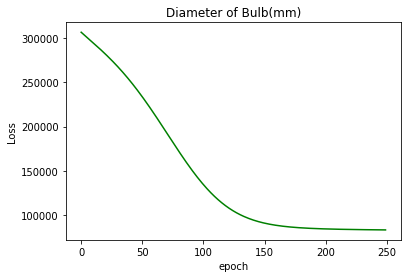

In [10]:
import matplotlib.pyplot as plt
#%matplotlib inline
#pred = pred.detach().numpy()
#pred = pred.numpy()
#loss = loss.detach().numpy()
# print("lost",losses)
# print("list",losses[0].tolist())
# print("pred", predictions[0].tolist())
# print("pred", predictions[0].ravel().tolist())
#model2 = model2.detach().numpy()
#target = target.detach().numpy()
plt.title('Diameter of Bulb(mm)')
plt.plot(losses, color='green')
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

In [11]:
#x = np.arange(0,88,1)

#plt.plot(x,predictions, color='red')
#plt.plot(x,target, color='green')
#plt.title('Prediction and True Values of Onion Bulb Diameter')
